In [1]:
import scipy.io as io

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:

data = io.loadmat("WLDataCW.mat")
print('length is ' + str(len(data)))
print(data.keys())
print(data['__globals__'])
data_only =  data["data"]
label = data["label"]
print(data_only.shape)
print(label.shape)
data_only=data_only
label=label

data_set = np.array(data_only)
data_set_2d = data_set.reshape(-1, 360)
data_set_2d=data_set_2d/255.

X_train, X_test, y_train, y_test = train_test_split(data_set_2d.T, label.T, test_size=0.30, random_state=100)

print(X_train.shape)

length is 5
dict_keys(['__header__', '__version__', '__globals__', 'data', 'label'])
[]
(62, 512, 360)
(1, 360)
(252, 31744)


In [3]:
class NeuralNetworkHandler:
    def __init__(self, inputSize, hiddenSizes, outputSize, learningRate=0.01):
        self.inputSize = inputSize
        self.hiddenSizes = hiddenSizes
        self.outputSize = outputSize
        self.learningRate = learningRate
        
        # Initialize first hidden layer weights and biases  
        self.weights1 = np.random.randn(self.inputSize, self.hiddenSizes[0])
        self.bias1 = np.zeros((1, self.hiddenSizes[0]))
        
        # Initialize second hidden layer weights and biases 
        self.weights2 = np.random.randn(self.hiddenSizes[0], self.hiddenSizes[1])
        self.bias2 = np.zeros((1, self.hiddenSizes[1]))
        
        # Initialize output layer weights and biases
        self.weightsOutput = np.random.randn(self.hiddenSizes[1], self.outputSize)
        self.biasOutput = np.zeros((1, self.outputSize))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, X):
        # First hidden layer
        self.hidden1 = np.dot(X, self.weights1) + self.bias1
        self.hiddenActivation1 = self.sigmoid(self.hidden1)
        
        # Second hidden layer
        self.hidden2 = np.dot(self.hiddenActivation1, self.weights2) + self.bias2
        self.hiddenActivation2 = self.sigmoid(self.hidden2)
        
        # Output layer
        self.outputLayer = np.dot(self.hiddenActivation2, self.weightsOutput) + self.biasOutput
        self.outputActivation = self.sigmoid(self.outputLayer)
        
        return self.outputActivation
    
    def sigmoidDerivative(self, x):
        return x * (1 - x)
    
    def backward(self, X, y, output):
        # Output layer
        errorOutput = y - output
        dOutput = errorOutput * self.sigmoidDerivative(output)
        
        # Second hidden layer
        errorHidden2 = np.dot(dOutput, self.weightsOutput.T)
        Dhidden2 = errorHidden2 * self.sigmoidDerivative(self.hiddenActivation2)
        
        # First hidden layer
        errorHidden1 = np.dot(Dhidden2, self.weights2.T)
        d_hidden1 = errorHidden1 * self.sigmoidDerivative(self.hiddenActivation1)
        
        # Weights and biases updation 
        self.weightsOutput += np.dot(self.hiddenActivation2.T, dOutput) * self.learningRate
        self.biasOutput += np.sum(dOutput, axis=0, keepdims=True) * self.learningRate
        
        self.weights2 += np.dot(self.hiddenActivation1.T, Dhidden2) * self.learningRate
        self.bias2 += np.sum(Dhidden2, axis=0, keepdims=True) * self.learningRate
        
        self.weights1 += np.dot(X.T, d_hidden1) * self.learningRate
        self.bias1 += np.sum(d_hidden1, axis=0, keepdims=True) * self.learningRate

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            loss = self.binaryCrossEntropyLoss(y, output)
            self.backward(X, y, output)
            if epoch % 100 == 0:
                print(f"Epoch {epoch+1}/{epochs} - Loss: {loss}")
            
    def kFoldCrossValidation(self, X, y, k=5, epochs=100):
        # Split data into k folds
        X_folds = np.array_split(X, k)
        y_folds = np.array_split(y, k)

        # Initialize arrays for storing evaluation metrics
        accuracies = []
        losses = []

        for i in range(k):
            # Use fold i as validation set and concatenate remaining folds as training set
            X_train = np.concatenate(X_folds[:i] + X_folds[i+1:])
            y_train = np.concatenate(y_folds[:i] + y_folds[i+1:])
            X_val = X_folds[i]
            y_val = y_folds[i]

            # Train on training set
            self.train(X_train, y_train, epochs)

            # Evaluate on validation set
            y_pred = self.predict(X_val)
            accuracy = np.mean(y_pred == y_val)
            loss = self.binaryCrossEntropyLoss(y_val, self.forward(X_val))
            accuracies.append(accuracy)
            losses.append(loss)

        # Calculate and return average metrics across all folds
        avg_accuracy = np.mean(accuracies)
        avg_loss = np.mean(losses)
        return avg_accuracy, avg_loss
    
    def predict(self, X):
        output = self.forward(X)
        predictions = np.round(output)
        return predictions
    
    def binaryCrossEntropyLoss(self, y, y_hat):
        loss = -(1/len(y)) * np.sum(y * np.log(y_hat) 
                                    + (1 - y) * np.log(1 - y_hat))
        return loss


In [4]:
inputSize = X_train.shape[1]
hiddenSizes = [70,30] 
outputSize = 1 
learningRate = 0.1 

# Create a NeuralNetwork class instance with 2 hidden layers and 10 neurons in each layer
nn = NeuralNetworkHandler(inputSize, hiddenSizes, outputSize, learningRate)


In [5]:

# epochs = 100
# nn.train(X_train, y_train, epochs)


yPred = nn.predict(X_test)

print(yPred)

Epoch 1/2000 - Loss: 1.9053312420777773
Epoch 101/2000 - Loss: 0.026772829447669
Epoch 201/2000 - Loss: 0.016082267272374377
Epoch 301/2000 - Loss: 0.012433714528805104
Epoch 401/2000 - Loss: 0.010421210717011766
Epoch 501/2000 - Loss: 0.009121612993585333
Epoch 601/2000 - Loss: 0.008198225771547022
Epoch 701/2000 - Loss: 0.007499503987996568
Epoch 801/2000 - Loss: 0.006947175870029779
Epoch 901/2000 - Loss: 0.006496430885062856
Epoch 1001/2000 - Loss: 0.006119577740088774
Epoch 1101/2000 - Loss: 0.005798474463476046
Epoch 1201/2000 - Loss: 0.005520674434984732
Epoch 1301/2000 - Loss: 0.00527731364919783
Epoch 1401/2000 - Loss: 0.005061882030889043
Epoch 1501/2000 - Loss: 0.004869473476258358
Epoch 1601/2000 - Loss: 0.004696309146699466
Epoch 1701/2000 - Loss: 0.004539423742374327
Epoch 1801/2000 - Loss: 0.004396452706743797
Epoch 1901/2000 - Loss: 0.0042654840201832135
Epoch 1/2000 - Loss: 0.4842899818789021
Epoch 101/2000 - Loss: 0.19221983416222901
Epoch 201/2000 - Loss: 0.053055688

In [8]:
print(f"Average accuracy: {accuracy:.2f}, average loss: {loss:.2f}")


Average accuracy: 0.89, average loss: 0.38


## Confusion martix

In [6]:
     
def confusionMatrix(yTrue, yPred):
    classes = np.unique(yTrue)
    confMatrix = np.zeros((len(classes), len(classes)))
    for i in range(len(yTrue)):
        trueClass = np.where(classes == yTrue[i])[0][0]
        predClass = np.where(classes == yPred[i])[0][0]
        confMatrix[trueClass, predClass] += 1
    return confMatrix

confMatrix = confusionMatrix(y_test, yPred)

[[30. 25.]
 [24. 29.]]


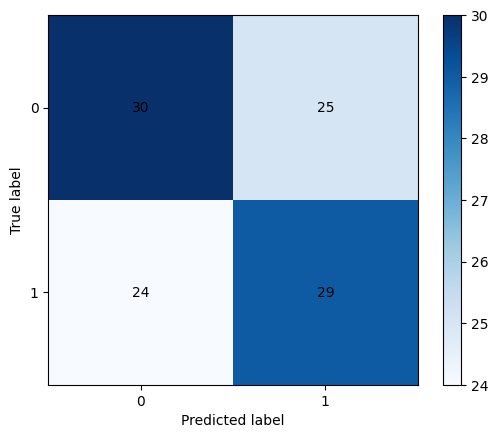

In [7]:

def plotConfusionMatrix(confMatrix, classes):
    fig, ax = plt.subplots()
    im = ax.imshow(confMatrix, cmap='Blues')

    ax.set_xticks(range(len(classes)))
    ax.set_yticks(range(len(classes)))
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

    for i in range(len(classes)):
        for j in range(len(classes)):
            ax.text(j, i, int(confMatrix[i, j]), ha='center', va='center', color='black')

    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    plt.show()


print(confMatrix)
classes = np.unique(label)

plotConfusionMatrix(confMatrix, classes)